In [1]:
import h5py
from ipywidgets import interact
import xrayutilities_id01_functions as id01
import xrayutilities as xu
import numpy as np
from mayavi import mlab
import matplotlib.pyplot as plt
%matplotlib inline

/home/edoardo/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
d = '../h5_files/'
!ls {d} | grep h5

20161115_E16019.h5
20161115_E16020.h5
20161115_E16088.h5
20161115_E16095.h5
20161117_E16014.h5
20161117_E16018.h5
20161117_E16095.h5


In [3]:
fname = '20161115_E16088.h5'
f = h5py.File(d+fname)
f.keys()

[u'scan_0005',
 u'scan_0006',
 u'scan_0007',
 u'scan_0008',
 u'scan_0220',
 u'scan_0221',
 u'scan_0222']

In [4]:
scan = f['scan_0008/data/image_data']
scan.shape

(151, 516, 516)

Raw data:

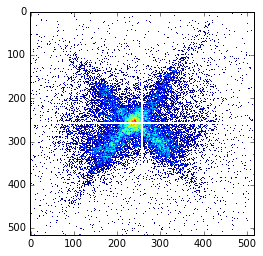

In [18]:
@interact(i=(0,scan.shape[0]))
def plt_scan(i):
    plt.imshow(np.log(scan[i]),interpolation='none')

In [63]:
# make gif!
for image in range(scan.shape[0]):
    plt.imshow(np.log(scan[image]),interpolation='none')
    plt.savefig('./img/{0}_s10_im_{1}.png'.format(fname[:-3],image),dpi=350)
    plt.clf()
!convert -delay 20 -loop 0 *png xpcs.gif

convert: unable to open image `*png': No such file or directory @ error/blob.c/OpenBlob/2705.
convert: no decode delegate for this image format `' @ error/constitute.c/ReadImage/504.
convert: no images defined `xpcs.gif' @ error/convert.c/ConvertImageCommand/3257.


The following reconstructs the data. The number of gridding points affects its resolution. 

In [5]:
SCANNR = 8
h5file = d + fname
# number of points to be used during the gridding
nx, ny, nz = 100,100,100
qx, qy, qz, gint, gridder = id01.gridmap(
            h5file, SCANNR, nx, ny, nz,angdelta=[0, 45, 0, 0])
# plot 3D map using mayavi mlab
QX,QY,QZ = np.mgrid[qx.min():qx.max():1j * nx,
                          qy.min():qy.max():1j * ny,
                          qz.min():qz.max():1j*nz]
INT = xu.maplog(gint,4.5,0)

['eta', 'H', 'K', 'L', 'Epoch', 'Seconds', 'bv1', 'opt1', 'opt2', 'bv2', 'att2', 'bv3', 'bv4', 'exp2', 'Srcur', 'roi1', 'roi2', 'roi3', 'roi4', 'roi5', 'mpx4ro1', 'mpx4ro2', 'mpx4inr', 'exp1', 'mpx4int']
None
['eta']


Sums in the three directions:

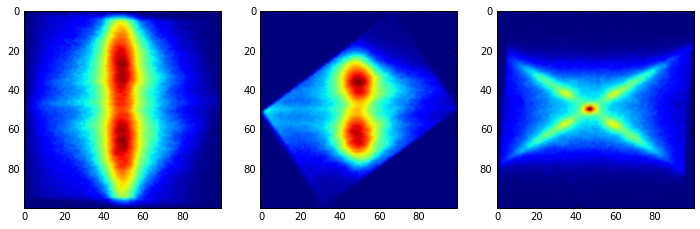

In [6]:
fig, ax = plt.subplots(1,3,figsize=(12,4))
for n in range(3):
    ax[n].imshow((INT.sum(axis=n)))

In [6]:
mlab.figure()
mlab.contour3d(QX, QY, QZ, INT, contours=15, opacity=0.5)
mlab.colorbar(title="log(int)", orientation="vertical")
mlab.axes(nb_labels=5, xlabel='Qx', ylabel='Qy', zlabel='Qz')
mlab.title('SCAN:%i'%SCANNR)
mlab.show()

### Visualise with Mayavi (opens another python instance)

In [10]:
%%writefile plt_3d.py

d = '../h5_files/'
fname = '20161115_E16019.h5'

SCANNR = 1
h5file = d + fname

import xrayutilities_id01_functions as id01
import numpy as np
import xrayutilities as xu
from mayavi import mlab



# number of points to be used during the gridding
nx, ny, nz = 100,100,100


qx, qy, qz, gint, gridder = id01.gridmap(
            h5file, SCANNR, nx, ny, nz,angdelta=[0, 0, 0, 0])
# plot 3D map using mayavi mlab
QX,QY,QZ = np.mgrid[qx.min():qx.max():1j * nx,
                          qy.min():qy.max():1j * ny,
                          qz.min():qz.max():1j*nz]
INT = xu.maplog(gint,4.5,0)
mlab.figure()
mlab.contour3d(QX, QY, QZ, INT, contours=15, opacity=0.5)
mlab.colorbar(title="log(int)", orientation="vertical")
mlab.axes(nb_labels=5, xlabel='Qx', ylabel='Qy', zlabel='Qz')
mlab.title('SCAN:%i'%SCANNR)
mlab.show()

Overwriting plt_3d.py


In [11]:
%%bash
zsh 
source $HOME/.zshrc
activate_canopy 
python plt_3d.py

]2;source '/Users/ezatterin/Library/Enthought/Canopy_64bit/User/bin/activate']1;]2;python plt_3d.py]1;['eta', 'H', 'K', 'L', 'Epoch', 'Seconds', 'bv1', 'opt1', 'opt2', 'bv2', 'att2', 'bv3', 'bv4', 'exp2', 'Srcur', 'roi1', 'roi2', 'roi3', 'roi4', 'roi5', 'mpx4ro1', 'mpx4ro2', 'mpx4inr', 'exp1', 'mpx4int']
None
['eta']


libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
